# Лабораторная работа №6. Многоскоростная обработка сигналов.

In [31]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот,
        соотвествующих вычисленным значениям
        спектральной функции
    complex
        значения спектральной функции
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

In [32]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
%matplotlib widget
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
# %matplotlib inline

# Модуль 1. Интерполяция сигналов.

## Задача 1.1. Интерполяция сигналов с помощью ДПФ.


Пусть некоторый периодический сигнал $y(t)$ был дискретизован в соответствии с теоремой Котельникова,  $x[k]$ — один период получившейся последовательности отсчетов. Произведите интерполяцию с коэффициентом $L=5$ путем добавления нулей в середину ДПФ сигнала $x[k]$. Объясните, почему восстановление сигнала в данном случае точное.

|Вариант| 	x[k]                                                                                        |   N 	|
|:-----:|:---------------------------------------------------------------------------------------------:|:-----:|
| 1     | $$ \cos{\left (\dfrac{3 \pi}{5} k \right )} + 4 \cos{\left (\dfrac{4 \pi}{5} k \right )} $$ 	| 10 	|
| 2     | $$ 0.2 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $$ 	| 8 	|
| 3     | $$ \cos{\left (\dfrac{\pi k}{5} \right )} + 3 \cos{\left (\dfrac{4 \pi}{5} k \right )}  $$ 	    | 10 	|
| 4     | $$ 0.1 \cos{\left (\dfrac{\pi k}{4} \right )} + \cos{\left (\dfrac{3 \pi}{4} k \right )} $$ 	| 8 	|
| 5     | $$ \cos{\left (\dfrac{2 \pi}{5} k \right )} + 6 \cos{\left (\dfrac{3 \pi}{5} k \right )} $$ 	| 10 	|
| 6     | $$ 0.1 \cos{\left (\dfrac{\pi k}{5} \right )} + \cos{\left (\dfrac{4 \pi}{5} k \right )} $$ 	| 10 	|

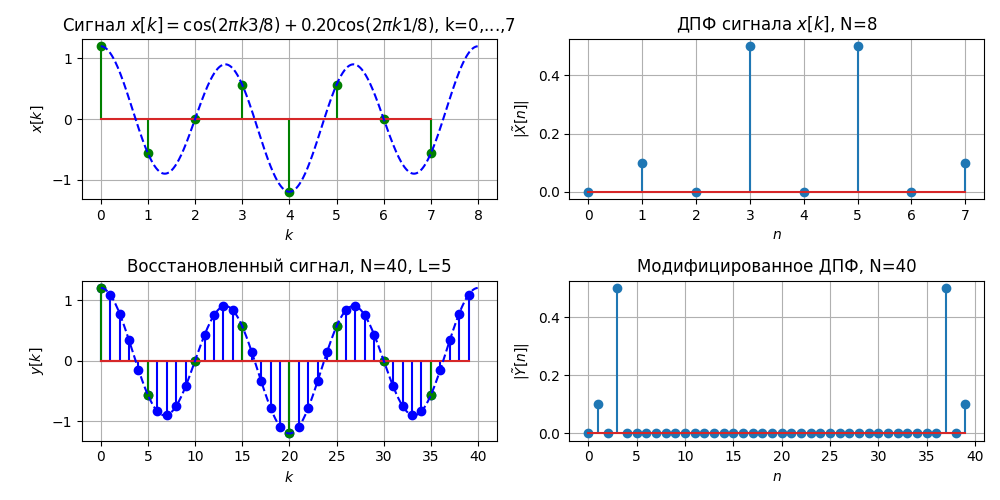

In [33]:
L, N = 5, 8
n_0 = 3
n_1 = 1
A = 0.2

k = np.arange(N)
x = np.cos(2 * np.pi * n_0 * k / N) + A * np.cos(2 * np.pi * n_1 * k / N)

Q = 1024
k1 = np.arange(Q)
q = np.cos(2 * np.pi * n_0 * k1 / Q) + A * np.cos(2 * np.pi * n_1 * k1 / Q)

plt.figure(figsize=[10, 5], dpi=100)
plt.subplot(2, 2, 1)
plt.stem(np.arange(x.size), x, "g", markerfmt="go")
plt.plot(N * np.arange(q.size) / Q, q, "b--")
plt.title(
    "Сигнал $x[k]=\cos(2\\pi k %i/%i)+%.2f\cos(2\\pi k %i/%i)$, k=0,...,%i"
    % (n_0, N, A, n_1, N, (N - 1))
)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.grid()

Xn = np.fft.fft(x, N) / N
plt.subplot(2, 2, 2)
plt.stem(np.arange(N), abs(Xn))
plt.title("ДПФ сигнала $x[k]$, N=%i" % N)
plt.xlabel("$n$")
plt.ylabel("$|\\tilde{X}[n]|$")
plt.grid()

if (N % 2) == 0:
    Yn = np.hstack(
        (
            Xn[0 : (N // 2)],
            Xn[N // 2] / 2,
            np.zeros((L - 1) * N - 1),
            Xn[N // 2] / 2,
            Xn[(N // 2 + 1) : N],
        )
    )
# if (N%2)!=0:
#    add code

plt.subplot(2, 2, 4)
plt.stem(np.arange(Yn.size), abs(Yn))
plt.title("Модифицированное ДПФ, N=%i" % (Yn.size))
plt.xlabel("$n$")
plt.ylabel("$|\\tilde{Y}[n]|$")
plt.grid()

x2 = np.fft.ifft(Yn) * L * N
plt.subplot(2, 2, 3)
plt.stem(np.arange(x2.size), x2.real, "b", markerfmt="bo")
plt.stem(Yn.size * np.arange(x.size) / N, x, "g", markerfmt="go")
plt.plot(L * N * np.arange(q.size) / Q, q, "b--")
plt.title("Восстановленный сигнал, N=%i, L=%i" % (Yn.size, L))
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.grid()
plt.tight_layout()

# plt.savefig('fft_iterpolation_1.eps', format = 'eps', bbox_inches='tight')
plt.show()

## Задача 1.2. Система однократной интерполяции.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=0,125$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.upfirdn()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $L$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор КИХ-фильтра для системы интерполяции. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) сигнала $q[k]$, получаемого добавлением $L-1$ отсчета между каждой парой исходных отсчетов,

* в) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$, $h[k]$, $q[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы интерполяции. 



In [34]:
N = 32
k = np.arange(N)
nu_1 = 0.125
nu_2 = 2 * nu_1
x = 3 * np.sin(2 * np.pi * nu_1 * k) + 6 * np.sin(2 * np.pi * nu_2 * k)
L = 4
fs = 500

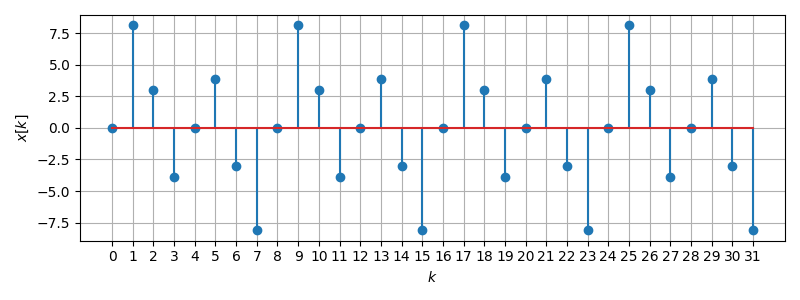

In [35]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.xticks(np.arange(x.size))
plt.tight_layout()
plt.grid()

In [36]:
q = signal.upfirdn([1], x, up=L)  # FIR filter

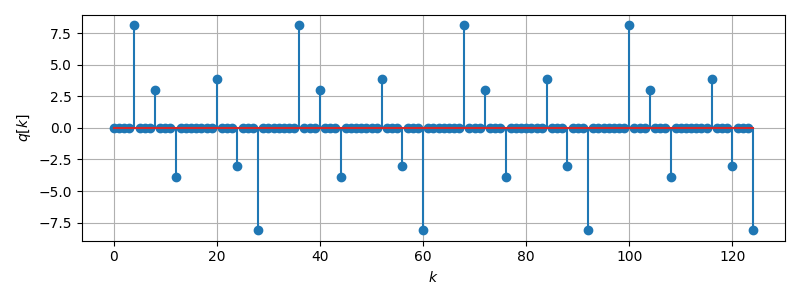

In [37]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(q.size), q)
plt.xlabel("$k$")
plt.ylabel("$q[k]$")
plt.tight_layout()
plt.grid()

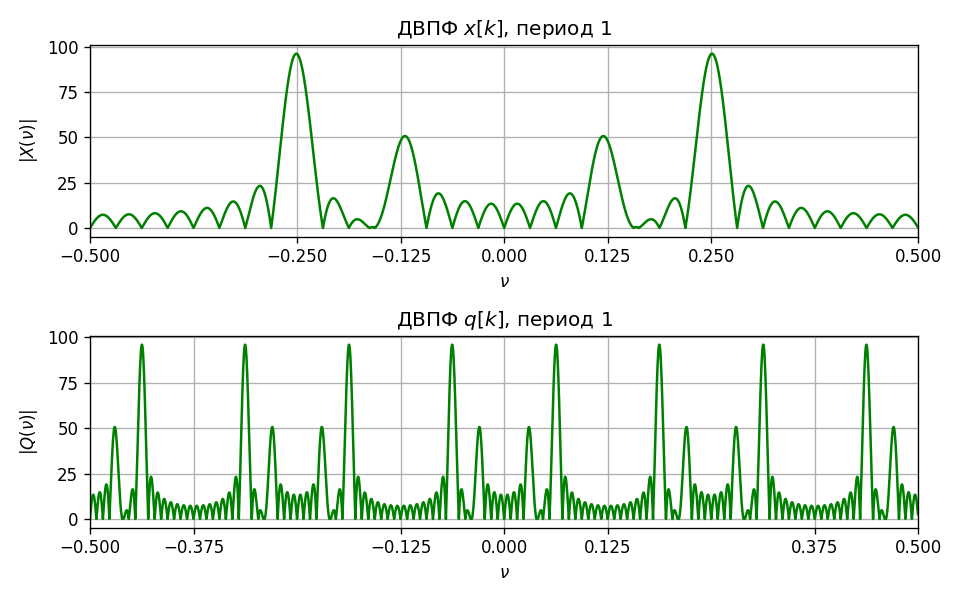

In [38]:
nu1, Xn = dtft(x)
nu2, Q = dtft(q)
plt.figure(figsize=[8, 5], dpi=120)

plt.subplot(2, 1, 1)
plt.plot(nu1, abs(Xn), "g")
plt.title("ДВПФ $x[k]$, период 1")
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -nu_2, -nu_1, 0, nu_1, nu_2, 0.5])
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(nu2, abs(Q), "g")
plt.title("ДВПФ $q[k]$, период 1")
plt.xlabel("$\\nu$")
plt.ylabel("$|Q(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -3 / (2 * L), -1 / (2 * L), 0, 1 / (2 * L), 3 / (2 * L), 0.5])
plt.grid()

plt.tight_layout()

In [39]:
nus = 1
bands = np.array([0, nu_1, nu_2, nus / 2])
desired = np.array([L, 0])
weight = np.array([1, 1])
numtaps = 64
h_pm = signal.remez(
    numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=nus
)
h_pm

array([-7.34300032e-06, -2.44841838e-05, -3.03041021e-06,  1.02235654e-04,
        1.63059792e-04, -1.00491990e-04, -5.95040303e-04, -4.75844269e-04,
        8.75773313e-04,  2.09782331e-03,  4.69334158e-04, -3.80195506e-03,
       -5.01115075e-03,  1.93386367e-03,  1.11933703e-02,  7.98153204e-03,
       -1.13193682e-02, -2.47032514e-02, -5.62150771e-03,  3.44576293e-02,
        4.22195686e-02, -1.35082666e-02, -7.84655762e-02, -5.40123474e-02,
        6.95359429e-02,  1.50815325e-01,  3.65618654e-02, -2.10672028e-01,
       -2.81336560e-01,  9.75846549e-02,  8.22364584e-01,  1.41130100e+00,
        1.41130100e+00,  8.22364584e-01,  9.75846549e-02, -2.81336560e-01,
       -2.10672028e-01,  3.65618654e-02,  1.50815325e-01,  6.95359429e-02,
       -5.40123474e-02, -7.84655762e-02, -1.35082666e-02,  4.22195686e-02,
        3.44576293e-02, -5.62150771e-03, -2.47032514e-02, -1.13193682e-02,
        7.98153204e-03,  1.11933703e-02,  1.93386367e-03, -5.01115075e-03,
       -3.80195506e-03,  

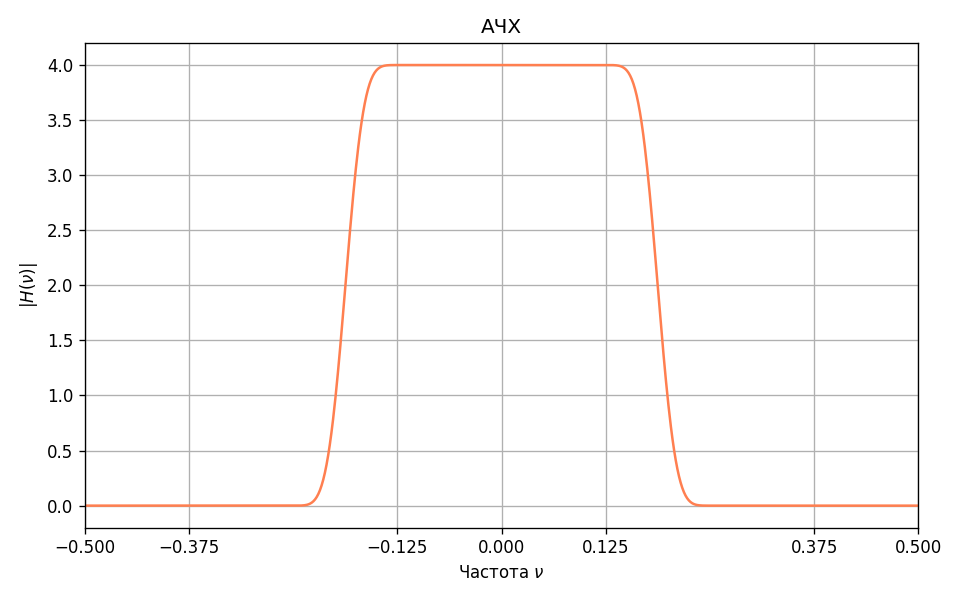

In [40]:
M = 1024
plt.figure(figsize=[8, 5], dpi=120)
H1 = abs(np.fft.fftshift(np.fft.fft(h_pm, M)))
plt.plot(np.arange(M) / M - 0.5, H1, color="coral")
plt.grid()
plt.ylabel("$|H(\\nu)|$")
plt.xlabel("Частота $\\nu$")
plt.title("АЧХ")
plt.xlim([-1 / 2, 1 / 2])
plt.xticks([-0.5, -3 / (2 * L), -1 / (2 * L), 0, 1 / (2 * L), 3 / (2 * L), 0.5])
plt.tight_layout()

In [41]:
y = signal.upfirdn(h_pm, x, up=L)  # FIR filter

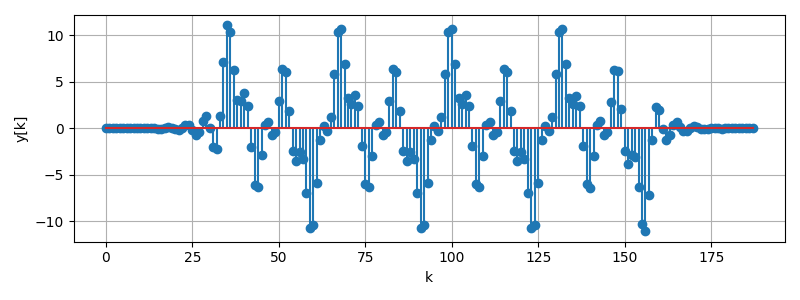

In [42]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.tight_layout()
plt.grid()

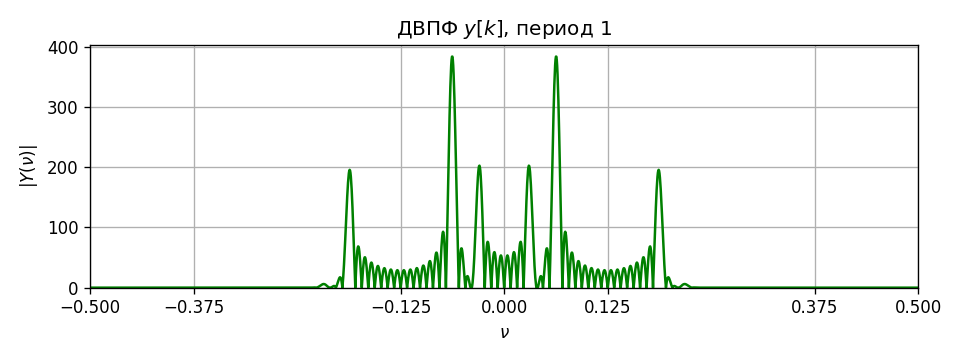

In [43]:
nu, Xn = dtft(y)

plt.figure(figsize=[8, 3], dpi=120)
plt.plot(nu, abs(Xn), "g")
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title("ДВПФ $y[k]$, период 1")
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -3 / (2 * L), -1 / (2 * L), 0, 1 / (2 * L), 3 / (2 * L), 0.5])
plt.grid()
plt.tight_layout()

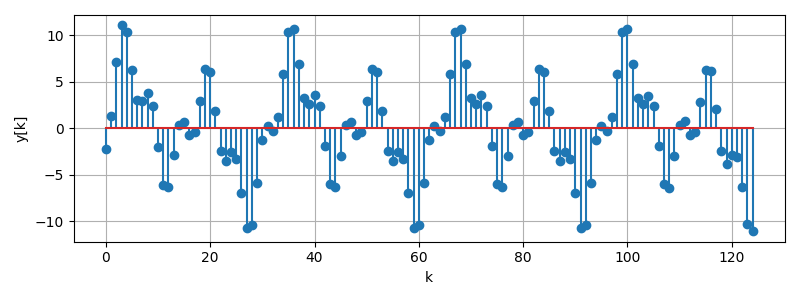

In [44]:
y = signal.upfirdn(h_pm, x, up=L)  # FIR filter
y = y[numtaps // 2 : -(numtaps // 2 - 1)]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.tight_layout()
plt.grid()

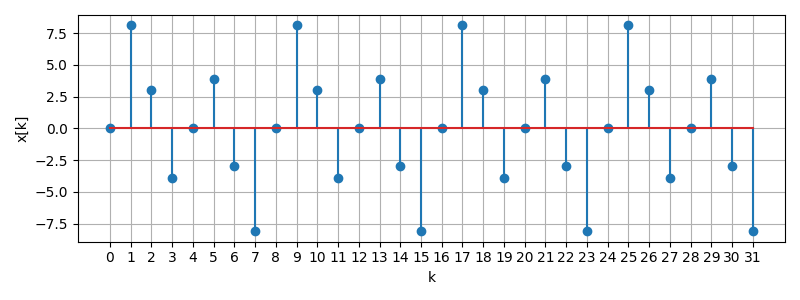

In [45]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xticks(np.arange(x.size))
plt.xlabel("k")
plt.ylabel("x[k]")
plt.tight_layout()
plt.grid()

## Задача 1.3. Интерполяция первого и нулевого порядка.

Повторите вычисления задачи 1.2 для КИХ-фильтров с импульсными характеристиками ${{h}_{0}}[k]$ и ${{h}_{1}}[k]$ и $L=2$. Сравните результаты.

${{h}_{0}}[k]=\left\{ \begin{matrix}
   1,\ \ \text{ при }k=0,\ \ 1,  \\
   0,\ \ \text{ при других }k.  \\
\end{matrix} \right.$

${{h}_{1}}[k]=\left\{ \begin{matrix}
   0,5,\ \ \text{ при }k=0,\ \ 2,  \\
   1,\ \ \text{ при }k=1,  \\
   0,\ \ \text{ при других  }k.  \\
\end{matrix} \right.$



In [46]:
h0 = np.zeros(N)
h1 = np.zeros(N)
h0[0:2] = 1
h1[0:3:2] = 0.5
h1[1] = 1
L = 2

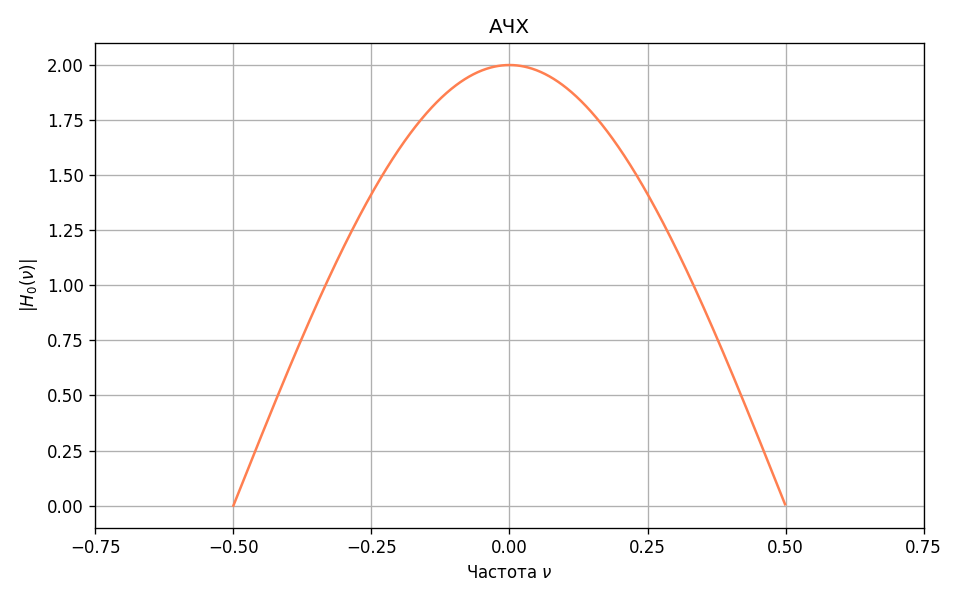

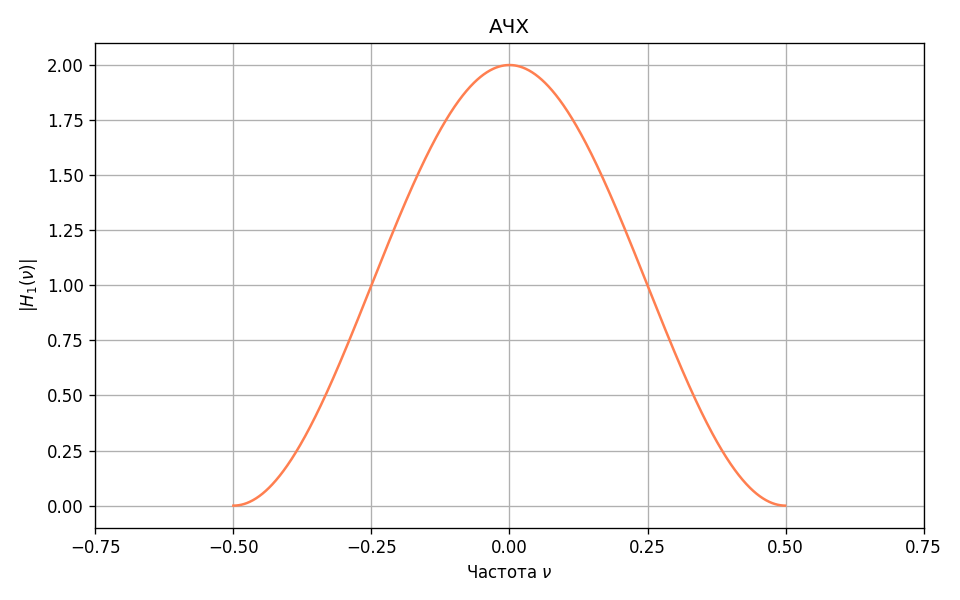

In [47]:
M = 1024
plt.figure(figsize=[8, 5], dpi=120)
H1 = abs(np.fft.fftshift(np.fft.fft(h0, M)))
plt.plot(np.arange(M) / M - 0.5, H1, color="coral")
plt.grid()
plt.ylabel("$|H_0(\\nu)|$")
plt.xlabel("Частота $\\nu$")
plt.title("АЧХ")
plt.xlim([-1 / 2, 1 / 2])
plt.xticks([-0.5, -3 / (2 * L), -1 / (2 * L), 0, 1 / (2 * L), 3 / (2 * L), 0.5])
plt.tight_layout()

M = 1024
plt.figure(figsize=[8, 5], dpi=120)
H1 = abs(np.fft.fftshift(np.fft.fft(h1, M)))
plt.plot(np.arange(M) / M - 0.5, H1, color="coral")
plt.grid()
plt.ylabel("$|H_1(\\nu)|$")
plt.xlabel("Частота $\\nu$")
plt.title("АЧХ")
plt.xlim([-1 / 2, 1 / 2])
plt.xticks([-0.5, -3 / (2 * L), -1 / (2 * L), 0, 1 / (2 * L), 3 / (2 * L), 0.5])
plt.tight_layout()

In [48]:
y = signal.upfirdn(h0, x, up=L)  # FIR filter

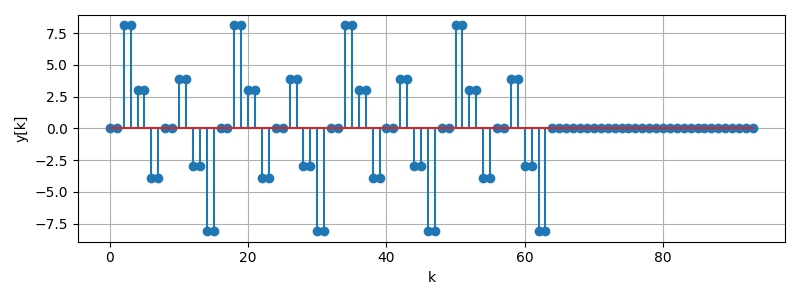

In [49]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.tight_layout()
plt.grid()

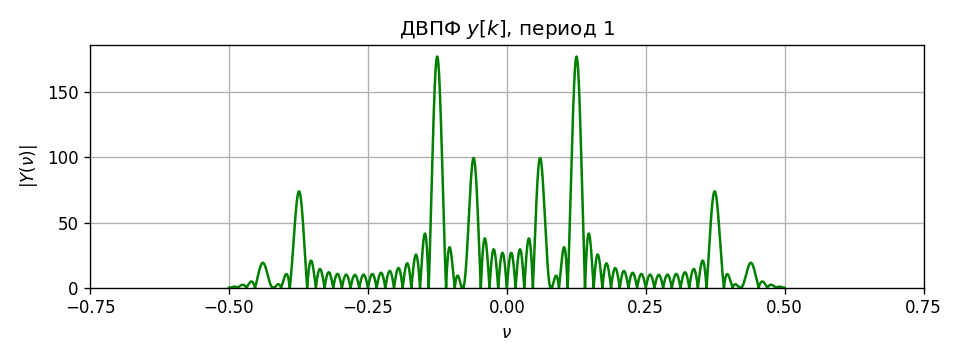

In [50]:
nu, Xn = dtft(y)

plt.figure(figsize=[8, 3], dpi=120)
plt.plot(nu, abs(Xn), "g")
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title("ДВПФ $y[k]$, период 1")
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -3 / (2 * L), -1 / (2 * L), 0, 1 / (2 * L), 3 / (2 * L), 0.5])
plt.grid()
plt.tight_layout()

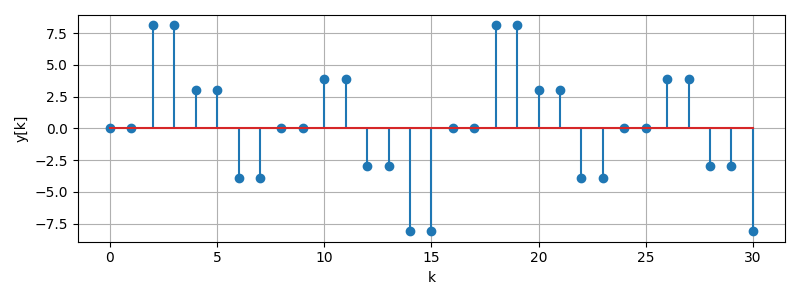

In [51]:
y = signal.upfirdn(h0, x, up=L)  # FIR filter
y = y[numtaps // 2 : -(numtaps // 2 - 1)]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.tight_layout()
plt.grid()

In [52]:
y = signal.upfirdn(h1, x, up=L)  # FIR filter

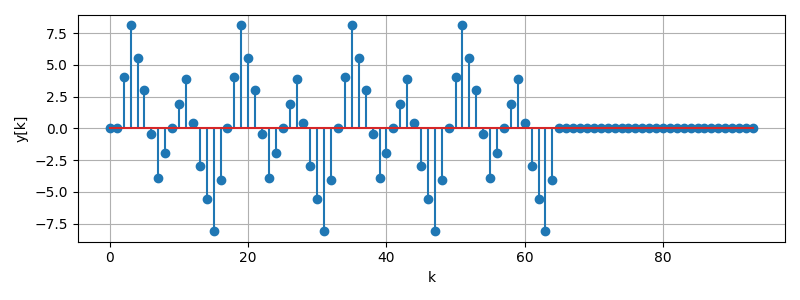

In [53]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.tight_layout()
plt.grid()

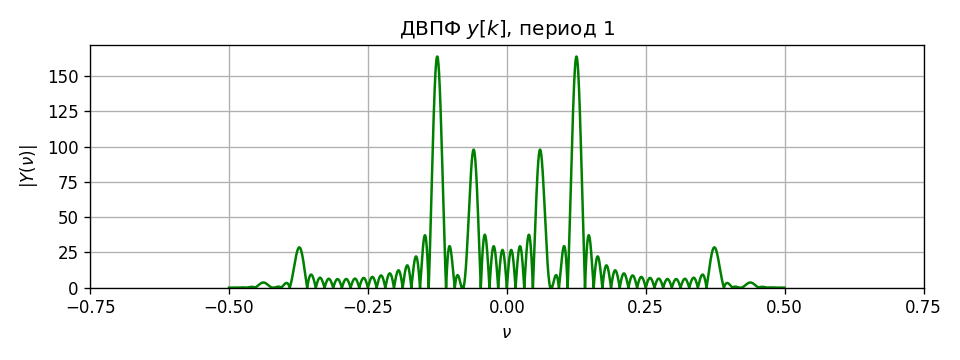

In [54]:
nu, Xn = dtft(y)

plt.figure(figsize=[8, 3], dpi=120)
plt.plot(nu, abs(Xn), "g")
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title("ДВПФ $y[k]$, период 1")
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -3 / (2 * L), -1 / (2 * L), 0, 1 / (2 * L), 3 / (2 * L), 0.5])
plt.grid()
plt.tight_layout()

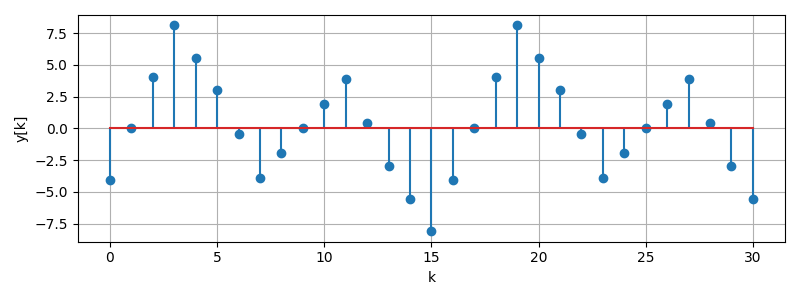

In [55]:
y = signal.upfirdn(h1, x, up=L)  # FIR filter
y = y[numtaps // 2 : -(numtaps // 2 - 1)]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel("y[k]")
plt.tight_layout()
plt.grid()

#  Модуль 2. Прореживание сигналов и передискретизация с рациональным шагом.

## Задача 2.1. Система однократной децимации.

Промоделируйте работу системы однократной децимации с коэффицентом $M$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 127$, $\nu_1=1/64$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $M$ |2 | 4 | 8 | 2 | 4 | 8|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для системы децимации. Изобразите на графиках его импульсную характеристику $h[k]$, АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы интерполяции во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы интерполяции во частотной области.

4) Пусть частота дискретизации входного сигнала системы однокраной децимации равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

In [56]:
L = M = 4
fs = 500
N = 128
k = np.arange(N)
nu_1 = 1 / 64
nu_2 = 2 * nu_1
x = 3 * np.sin(2 * np.pi * nu_1 * k) + 6 * np.sin(2 * np.pi * nu_2 * k)
assert fs * nu_2 / (fs / M) < 0.5 ### NO filter

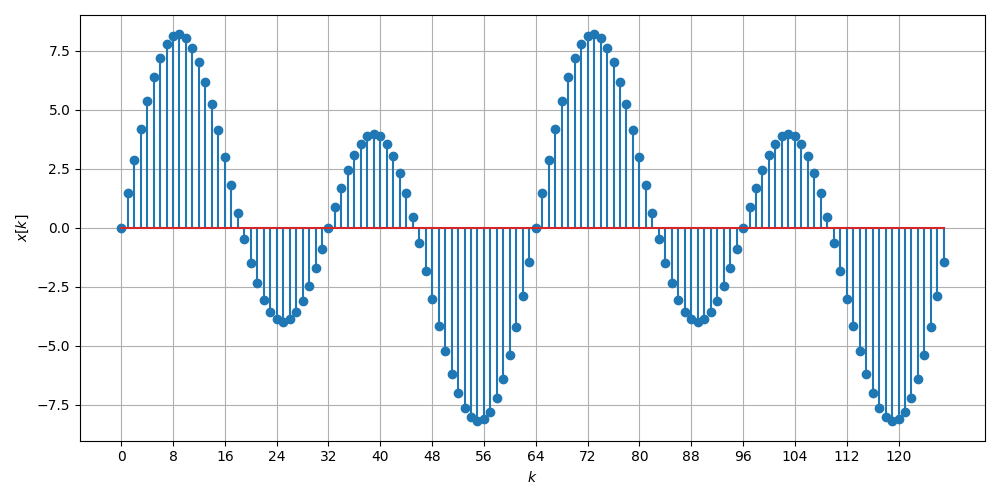

In [57]:
plt.figure(figsize=[10, 5], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.xticks(np.arange(0, x.size, 8))
plt.tight_layout()
plt.grid()

In [58]:
M = 4
x2 = signal.upfirdn([1], x, up=1, down=M)
t_k2 = k[::M]

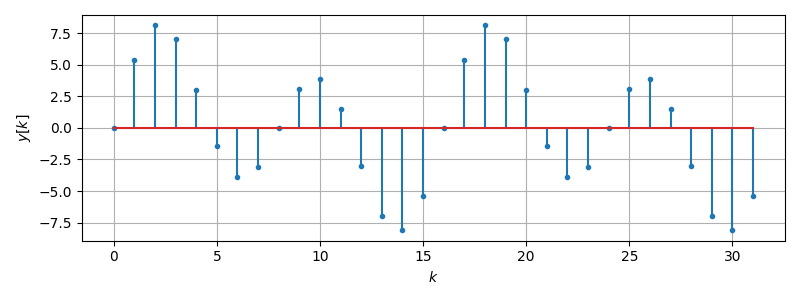

In [59]:
y = x2
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y, markerfmt=".")
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.tight_layout()
plt.grid()

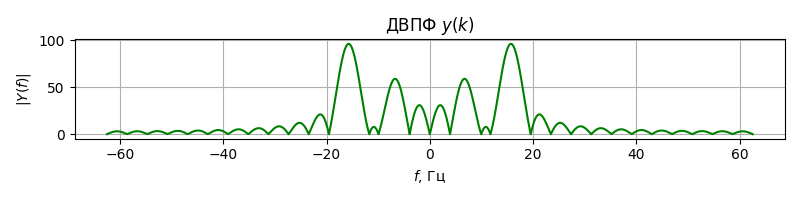

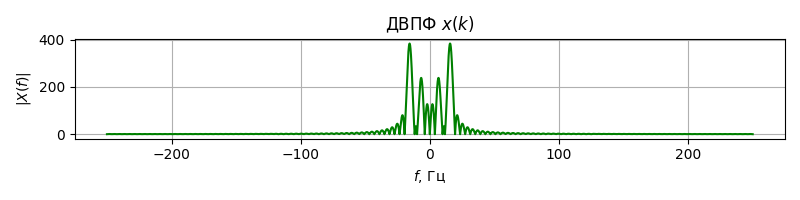

In [60]:
nu, Xn = dtft(y, M=2**18)

plt.figure(figsize=[8, 2], dpi=100)
plt.plot((fs * nu) / M, abs(Xn), "g")
plt.title("ДВПФ $y(k)$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|Y(f)|$")
plt.grid()
plt.tight_layout()
plt.show()

nu, Xn = dtft(x, M=2**18)

plt.figure(figsize=[8, 2], dpi=100)
plt.plot(fs * nu, abs(Xn), "g")
plt.title("ДВПФ $x(k)$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|X(f)|$")
plt.grid()
plt.tight_layout()
plt.show()

## Задача 2.2. Система однократной передискретизации с рациональным шагом.

Промоделируйте работу системы однократной передискретизации с коэффицентом $L/M=5/2$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 63$, $\nu_1=0,0625$, $\nu_2=2\nu_1$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Обоснуйте Ваш выбор фильтра для однократной передискретизации. Изобразите на графиках его АЧХ и ФЧХ.

2) Постройте графики, иллюстрирующие работу системы передискретизации во временной области:

* а) входного сигнала $x[k]$,

* б) выходного сигнала $y[k]$.

3) Постройте графики модуля ДВПФ последовательностей $x[k]$ и $y[k]$, иллюстрирующих работу системы передискретизации во частотной области.

4) Пусть частота дискретизации входного сигнала системы равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 

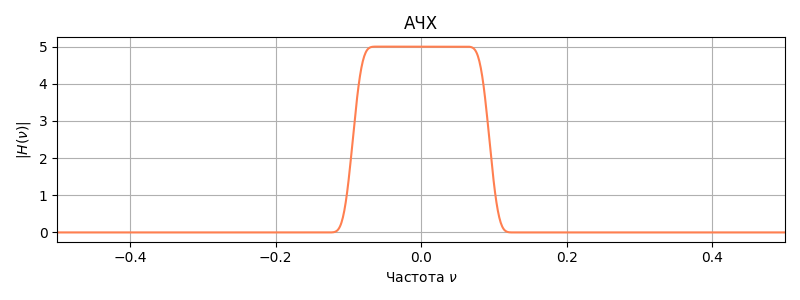

In [61]:
fs = 500
nu_1 = 0.0625
nu_2 = 2 * nu_1
f1 = nu_1 * fs
f2 = nu_2 * fs
L = 5
M = 2

bands = np.array([0, f1, f2, fs / 2])
desired = np.array([L, 0])
weight = np.array([1, 1])
numtaps = 100
h_pm = signal.remez(
    numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=fs
)

Q = 1024
H1 = abs(np.fft.fftshift(np.fft.fft(h_pm, Q)))
plt.figure(figsize=[8, 3])
plt.plot(np.arange(Q) / Q - 0.5, H1, color="coral")
plt.grid()
plt.ylabel("$|H(\\nu)|$")
plt.xlabel("Частота $\\nu$")
plt.title("АЧХ")
plt.xlim([-1 / 2, 1 / 2])
plt.tight_layout()

In [62]:
N = 64
k = np.arange(N)
x = 3 * np.sin(2 * np.pi * nu_1 * k) + 6 * np.sin(2 * np.pi * nu_2 * k)

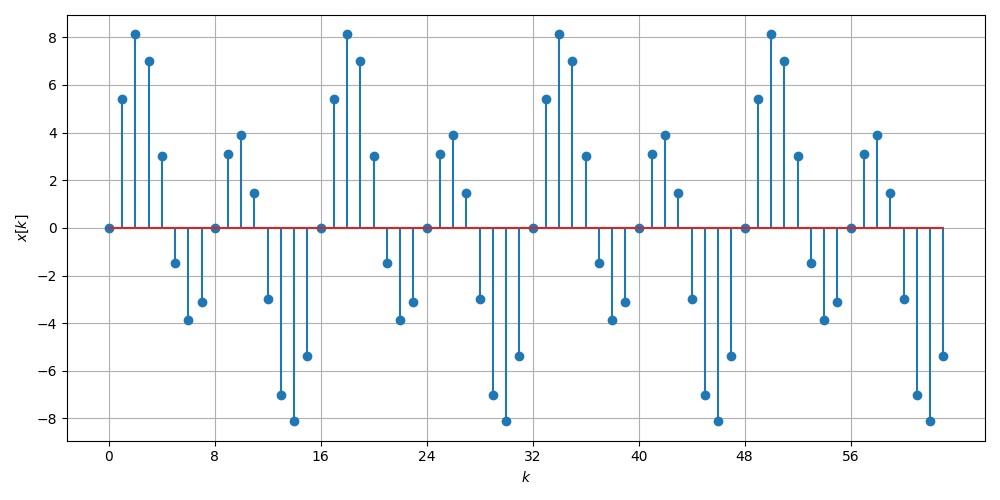

In [63]:
plt.figure(figsize=[10, 5], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.xticks(np.arange(0, x.size, 8))
plt.tight_layout()
plt.grid()

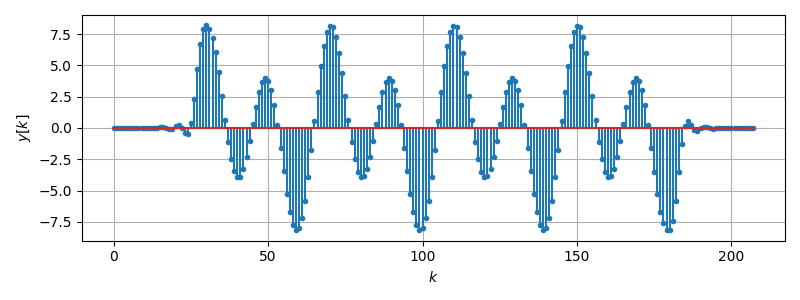

In [64]:
y = signal.upfirdn(h_pm, x, up=L, down=M)  # FIR filter
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y, markerfmt=".")
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.tight_layout()
plt.grid()

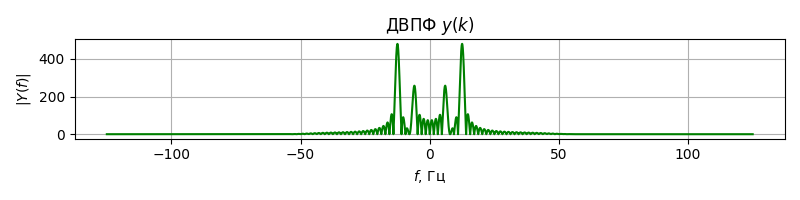

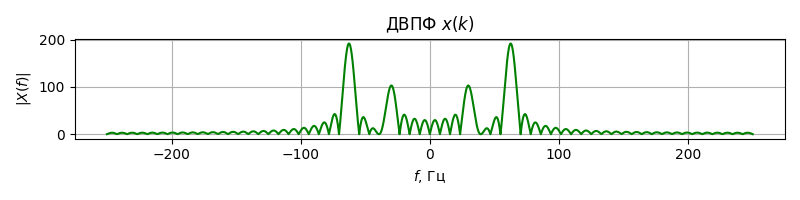

In [65]:
nu, Xn = dtft(y, M=2**18)

plt.figure(figsize=[8, 2], dpi=100)
plt.plot((fs * nu) / M, abs(Xn), "g")
plt.title("ДВПФ $y(k)$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|Y(f)|$")
plt.grid()
plt.tight_layout()
plt.show()

nu, Xn = dtft(x, M=2**18)

plt.figure(figsize=[8, 2], dpi=100)
plt.plot(fs * nu, abs(Xn), "g")
plt.title("ДВПФ $x(k)$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|X(f)|$")
plt.grid()
plt.tight_layout()
plt.show()

#  Модуль 3. Особенности реализации многоскоростных систем.

## Задача 3.1. Полифазные структуры многоскоростных систем.

Промоделируйте работу системы однократной интерполяции с коэффицентом $L=4$ при подаче на ее вход сигнала $x[k]=3\sin \left(2\pi \nu_1 k\right)+6\sin\left(2\pi \nu_2 k\right)$, $k=0,1,\dots, 31$, $\nu_1=5/32$, $\nu_2=2\nu_1$ с помощью функции ``scipy.signal.resample_poly()``

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $f_s$ |200 | 500 | 600 | 700 | 400 | 100 |

1) Постройте графики входного ($x[k]$) и выходного ($y[k]$) сигналов, и модулей их ДВПФ.

2) Изобразите схему данной полифазной структуры однократной интерполяции. 

3) Пусть частота дискретизации входного сигнала данной системы интерполяции равна $f_s$. Укажите шаг дискретизации и частоту дискретизации выходного сигнала системы. 


In [66]:
fs = 500
L, N = 4, 32
nu1 = 5 / N
nu2 = 2 * nu1
f1 = nu1 * fs
f2 = nu2 * fs
k = np.arange(N)
x = 3 * np.sin(2 * np.pi * nu1 * k) + 6 * np.sin(2 * np.pi * nu2 * k)
y = signal.resample_poly(x, up=L, down=1)

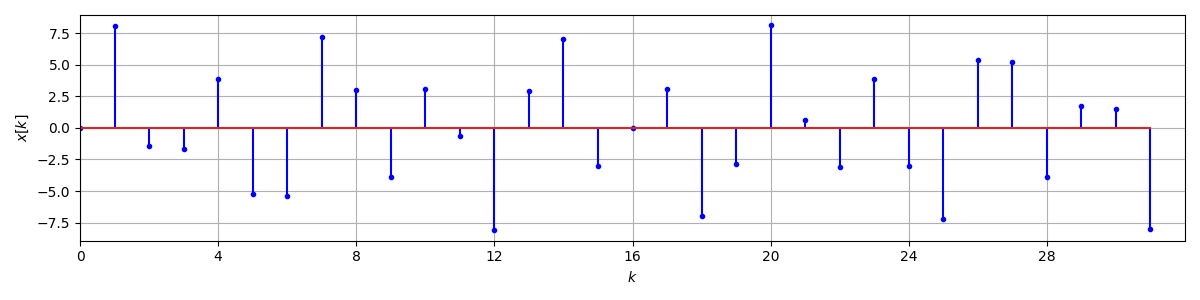

In [68]:
plt.figure(figsize=[12, 3])
k = np.arange(x.size)
plt.stem(k, x, "b", markerfmt="b.")
plt.grid()
plt.xticks(k[::L])
plt.xlim([0, x.size])
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.tight_layout()

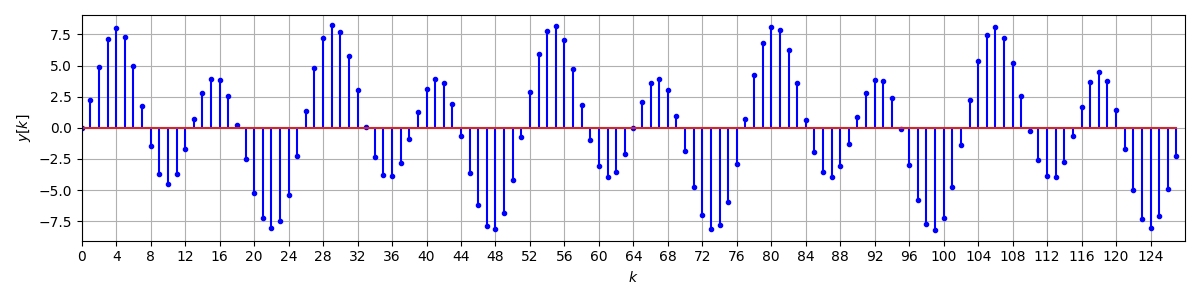

In [70]:
plt.figure(figsize=[12, 3])
k = np.arange(y.size)
plt.stem(k, y, "b", markerfmt="b.")
plt.grid()
plt.xticks(k[::L])
plt.xlim([0, y.size])
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.tight_layout()

## Задача 3.2. CIC-фильтры.

Постройте импульсную характеристику и АЧХ (в дБ) CIC-фильтра, состоящего из $Q$ последовательно соединенных каскадов, в каждом из которых длина импульсной характеристики равна $N$.

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $N$ |16 | 16 | 16 | 12 | 12 | 12 |
| $Q$ | 3 | 4 | 5 | 3 | 4 | 5 |

Определите максимальный уровень пульсаций фильтра в полосе пропускания (по максимальному уровню бокового лепестка относительно главного). 





In [86]:
N, Q = 16, 4
h1 = np.ones(N)
h2 = np.convolve(h1, h1)
h1 = h4 = np.convolve(h2, h2) / (N**4)

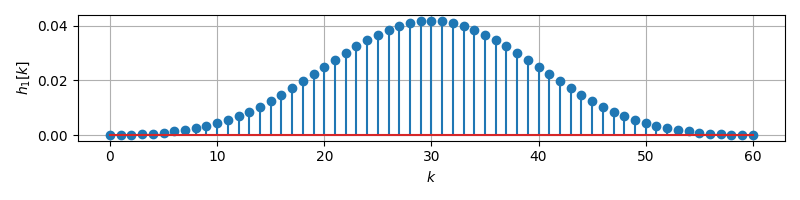

In [87]:
plt.figure(figsize=[8, 2])
plt.stem(np.arange(h1.size), h1)
# plt.xticks(np.arange(h1.size))
plt.xlabel("$k$")
plt.ylabel("$h_1[k]$")
plt.grid()
plt.tight_layout()

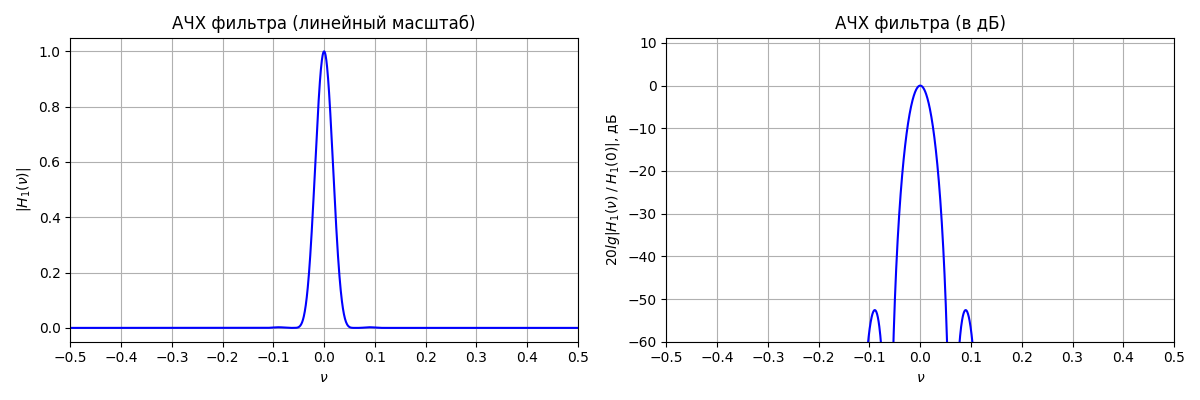

In [88]:
H1 = np.fft.fftshift(np.fft.fft(h1, 2048))
nu = np.arange(H1.size) / H1.size - 0.5
plt.figure(figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.plot(nu, abs(H1), "b")
plt.xlim([-0.5, 0.5])
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.xlabel("$\\nu$")
plt.ylabel("|$H_1(\\nu)|$")
plt.title("АЧХ фильтра (линейный масштаб)")
plt.grid()
plt.subplot(1, 2, 2)
with np.errstate(divide="ignore"):
    plt.plot(nu, 20 * np.log10(abs(H1) / max((abs(H1)))), "b")
plt.xlim([-0.5, 0.5])
plt.ylim(bottom=-60)
plt.xticks(np.arange(-0.5, 0.6, 0.1))
plt.xlabel("$\\nu$")
plt.ylabel("$20 lg|H_1(\\nu)\;/\;H_1(0)|$, дБ")
plt.title("АЧХ фильтра (в дБ)")
plt.grid()
plt.tight_layout()